In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds=pd.read_csv('Social_Network_Ads.csv')
x= ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# Training the SVM model

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0) 
classifier.fit(x_train,y_train)

# Predicting test result
y_pred= classifier.predict(x_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_5436\582356682.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('yellow','blue'))(i), label= j)


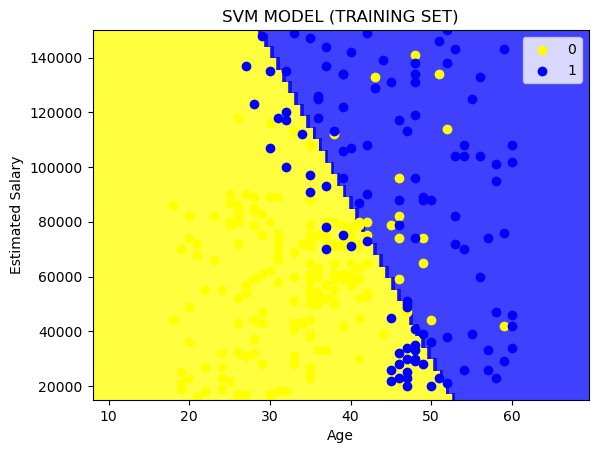

In [3]:
#visualizing
from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_train),y_train
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop = x_set[:,0].max()+ 10, step = 0.75),
                  np.arange(start=x_set[:,1].min() - 10, stop= x_set[:,1].max()+ 10, step = 0.75 ))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('yellow','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('yellow','blue'))(i), label= j)
plt.title('SVM MODEL (TRAINING SET)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5436\275519141.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('yellow','blue'))(i), label= j)


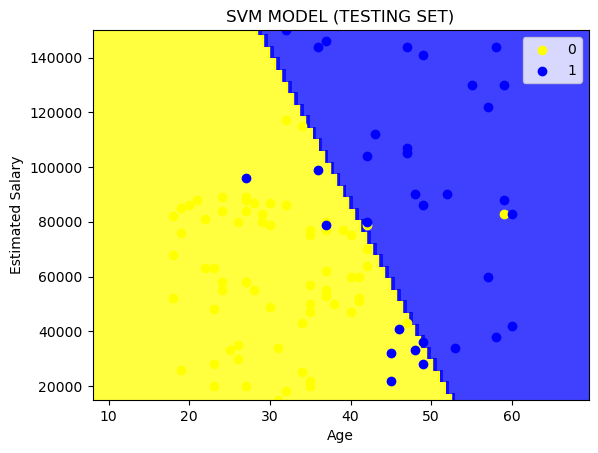

In [5]:
from matplotlib.colors import ListedColormap
x_set, y_set= sc.inverse_transform(x_test),y_test
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop = x_set[:,0].max()+ 10, step = 0.75),
                  np.arange(start=x_set[:,1].min() - 10, stop= x_set[:,1].max()+ 10, step = 0.75))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha=0.75, cmap = ListedColormap(('yellow','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1], c=ListedColormap(('yellow','blue'))(i), label= j)
plt.title('SVM MODEL (TESTING SET)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [6]:
#accuracy
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy of the model is : ', accuracy_score(y_test,y_pred))

[[66  2]
 [ 8 24]]
Accuracy of the model is :  0.9


In [7]:
print('Likelihood of age 30 salary 87000 buying insurance is :',classifier.predict(sc.transform([[30,87000]])))


Likelihood of age 30 salary 87000 buying insurance is : [0]


In [8]:
print('Likelihood of age 40 with salary 0 buying insurance is :',classifier.predict(sc.transform([[40,0]])))

Likelihood of age 40 with salary 0 buying insurance is : [0]


In [9]:
print('Likelihood of age 40 with salary 100,000 buying insurance is : ',classifier.predict(sc.transform([[40,100000]])))

Likelihood of age 40 with salary 100,000 buying insurance is :  [1]


In [10]:
# different from knn
print('Likelihood of age 50 with salary 0 buying insurance is : ',classifier.predict(sc.transform([[50,0]])))

Likelihood of age 50 with salary 0 buying insurance is :  [0]


In [11]:
print('Likelihood of age 18 with salary 0 buying insurance is : ',classifier.predict(sc.transform([[18,0]])))

Likelihood of age 18 with salary 0 buying insurance is :  [0]


In [12]:
print('Likelihood of age 22 with salary 600,000 buying insurance is : ',classifier.predict(sc.transform([[22,600000]])))

Likelihood of age 22 with salary 600,000 buying insurance is :  [1]


In [13]:
print('Likelihood of age 35 with salary 2,500,000 buying insurance is : ',classifier.predict(sc.transform([[35,2500000]])))

Likelihood of age 35 with salary 2,500,000 buying insurance is :  [1]


In [14]:
print('Likelihood of age 60 with salary 100,000,000 buying insurance is : ',classifier.predict(sc.transform([[60,100000000]])))

Likelihood of age 60 with salary 100,000,000 buying insurance is :  [1]


### Hypothesis & Assumption

###### 1 : Younger individuals are unlikely to buy insurance. 
###### 2 : Younger individuals with low income are least likely to purchase an insurance.
###### 3 : Older people are more likely to buy insurance.
###### 4 : People around the age or 45-65 are most likely to buy insurance.
###### 5 : Age plays more important role than salary

### Testing the Hypothesis

#1 Which was proven wrong

In [15]:
print('Likelihood of age 18 with salary 100,000 buying insurance is : ',classifier.predict(sc.transform([[18,10000]])))
print('Likelihood of age 20 with salary 550000 buying insurance is : ',classifier.predict(sc.transform([[20,550000]])))
print('Likelihood of age 23 with salary 200000 buying insurance is : ',classifier.predict(sc.transform([[23,200000]])))
print('Likelihood of age 28 with salary 100000 buying insurance is : ',classifier.predict(sc.transform([[28,100000]])))
print('Likelihood of age 35 with salary 700000 buying insurance is : ',classifier.predict(sc.transform([[35,700000]])))

Likelihood of age 18 with salary 100,000 buying insurance is :  [0]
Likelihood of age 20 with salary 550000 buying insurance is :  [1]
Likelihood of age 23 with salary 200000 buying insurance is :  [1]
Likelihood of age 28 with salary 100000 buying insurance is :  [0]
Likelihood of age 35 with salary 700000 buying insurance is :  [1]


#2 Which was proven right

In [16]:
print('Likelihood of age 20 with salary 100000 buying insurance is : ',classifier.predict(sc.transform([[20,100000]])))
print('Likelihood of age 35 with salary 5,00,000 buying insurance is : ',classifier.predict(sc.transform([[35,500000]])))
print('Likelihood of age 35 with salary 1,00,000 buying insurance is : ',classifier.predict(sc.transform([[35,100000]])))
print('Likelihood of age 25 with salary 50000 buying insurance is : ',classifier.predict(sc.transform([[25,50000]])))
print('Likelihood of age 32 with salary 50000 buying insurance is : ',classifier.predict(sc.transform([[32,50000]])))

Likelihood of age 20 with salary 100000 buying insurance is :  [0]
Likelihood of age 35 with salary 5,00,000 buying insurance is :  [1]
Likelihood of age 35 with salary 1,00,000 buying insurance is :  [0]
Likelihood of age 25 with salary 50000 buying insurance is :  [0]
Likelihood of age 32 with salary 50000 buying insurance is :  [0]


#3 Which was proven Right

In [17]:
print('Likelihood of age 50 with salary 2,00,000 buying insurance is : ',classifier.predict(sc.transform([[50,200000]])))
print('Likelihood of age 18 with salary 2,00,000 buying insurance is : ',classifier.predict(sc.transform([[18,200000]])))
print('Likelihood of age 20 with salary 12,000 buying insurance is : ',classifier.predict(sc.transform([[20,12000]])))
print('Likelihood of age 75 with salary 12000 buying insurance is : ',classifier.predict(sc.transform([[75,12000]])))
print('Likelihood of age 71 with salary 2,20,000 buying insurance is : ',classifier.predict(sc.transform([[71,220000]])))

Likelihood of age 50 with salary 2,00,000 buying insurance is :  [1]
Likelihood of age 18 with salary 2,00,000 buying insurance is :  [0]
Likelihood of age 20 with salary 12,000 buying insurance is :  [0]
Likelihood of age 75 with salary 12000 buying insurance is :  [1]
Likelihood of age 71 with salary 2,20,000 buying insurance is :  [1]


#4 Which was proved Right

In [18]:
print('Likelihood of age 45 with salary 500000 buying insurance is : ',classifier.predict(sc.transform([[45,500000]])))
print('Likelihood of age 52 with salary 2000000 buying insurance is : ',classifier.predict(sc.transform([[52,2000000]])))
print('Likelihood of age 50 with salary 234500 buying insurance is : ',classifier.predict(sc.transform([[50,234500]])))
print('Likelihood of age 58 with salary 9156325 buying insurance is : ',classifier.predict(sc.transform([[58,9156325]])))
print('Likelihood of age 62 with salary 250000 buying insurance is : ',classifier.predict(sc.transform([[62,250000]])))

Likelihood of age 45 with salary 500000 buying insurance is :  [1]
Likelihood of age 52 with salary 2000000 buying insurance is :  [1]
Likelihood of age 50 with salary 234500 buying insurance is :  [1]
Likelihood of age 58 with salary 9156325 buying insurance is :  [1]
Likelihood of age 62 with salary 250000 buying insurance is :  [1]


#5 Which was proved Right

In [20]:
print('Likelihood of age 50 with salary 200,000 buying insurance is : ',classifier.predict(sc.transform([[50,200000]])))
#differ from Logistic Reg
print('Likelihood of age 21 with salary 200,000 buying insurance is : ',classifier.predict(sc.transform([[21,200000]])))
print('Likelihood of age 65 with salary 35000 buying insurance is : ',classifier.predict(sc.transform([[65,35000]])))
print('Likelihood of age 38 with salary 35000 buying insurance is : ',classifier.predict(sc.transform([[38,35000]])))
print('Likelihood of age 81 with salary 70000 buying insurance is : ',classifier.predict(sc.transform([[81,70000]])))

Likelihood of age 50 with salary 200,000 buying insurance is :  [1]
Likelihood of age 21 with salary 200,000 buying insurance is :  [1]
Likelihood of age 65 with salary 35000 buying insurance is :  [1]
Likelihood of age 38 with salary 35000 buying insurance is :  [0]
Likelihood of age 81 with salary 70000 buying insurance is :  [1]
